# Ejercicio de Lab 3. PCA y SOM

## Algoritmo PCA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Se lee el dataset
diabetes = pd.read_csv('datasets/diabetes_prediction_dataset.csv')
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
select_data = diabetes[['age','hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level']]
print(select_data)

        age  hypertension  heart_disease    bmi  HbA1c_level  \
0      80.0             0              1  25.19          6.6   
1      54.0             0              0  27.32          6.6   
2      28.0             0              0  27.32          5.7   
3      36.0             0              0  23.45          5.0   
4      76.0             1              1  20.14          4.8   
...     ...           ...            ...    ...          ...   
99995  80.0             0              0  27.32          6.2   
99996   2.0             0              0  17.37          6.5   
99997  66.0             0              0  27.83          5.7   
99998  24.0             0              0  35.42          4.0   
99999  57.0             0              0  22.43          6.6   

       blood_glucose_level  
0                      140  
1                       80  
2                      158  
3                      155  
4                      155  
...                    ...  
99995                   90  

In [4]:
# Se utiliza el algoritmo PCA
from sklearn.decomposition import PCA

pca = PCA(2)
pca_res = pca.fit_transform(select_data)

diabetes['X'] = pca_res[:, 0]
diabetes['Y'] = pca_res[:, 1]
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,X,Y
0,Female,80.0,0,1,never,25.19,6.6,140,0,5.252059,37.364342
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,-56.753558,17.189195
2,Male,28.0,0,0,never,27.32,5.7,158,0,18.641200,-15.535632
3,Female,36.0,0,0,current,23.45,5.0,155,0,16.284384,-7.748284
4,Male,76.0,1,1,current,20.14,4.8,155,0,19.742065,31.533386


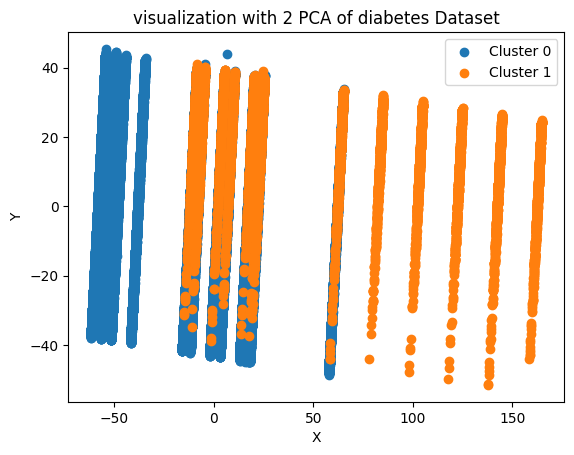

In [5]:
cluster_0 = diabetes[diabetes['diabetes']==0]
cluster_1 = diabetes[diabetes['diabetes']==1]

plt.scatter(cluster_0['X'], cluster_0['Y'], label ='Cluster 0')
plt.scatter(cluster_1['X'], cluster_1['Y'], label ='Cluster 1')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('visualization with 2 PCA of diabetes Dataset')
plt.show()

## Algoritmo SOM

In [6]:
heart = pd.read_csv('datasets/HeartAttack_DataSet.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
select_heart = heart.iloc[:,:13]
cluster = heart['target']
print(select_heart)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [18]:
from sklearn_som.som import SOM

heart_som = SOM(m=2, n=1,dim=13)

# Ajustar el SOM al dataset
heart_som.fit(select_heart.to_numpy())

predictions = heart_som.predict(select_heart.to_numpy())
print(predictions)

[0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1
 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0
 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0
 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 0]


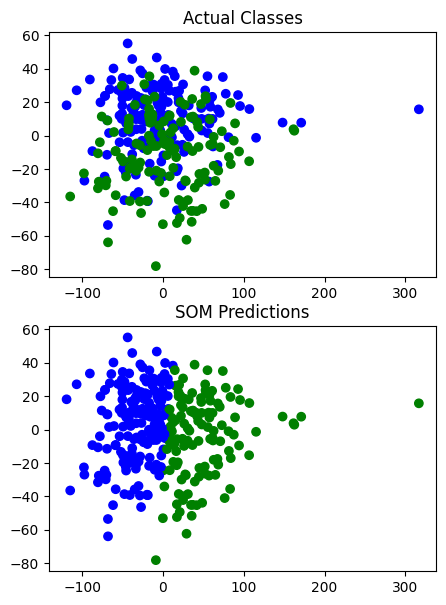

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

pca = PCA(2)
pca_res = pca.fit_transform(select_heart)

X= pca_res[:, 0]
Y= pca_res[:, 1]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5,7))

colors = ['green', 'blue']

ax[0].scatter(X, Y,c=cluster,cmap=ListedColormap(colors))
ax[0].title.set_text('Actual Classes')
ax[1].scatter(X, Y, c=predictions, cmap=ListedColormap(colors))
ax[1].title.set_text('SOM Predictions')
plt.show()